In [1]:
import os
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
book_dir = "./Books"
text = "This is a test text. We're keeping this text short to keep things manageable."

stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))

In [2]:
def count_words(text):
    """
    Count the number of times each word occurs in text (str). Return dictionary
    where keys are unique words and values are word counts.
    """
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

In [3]:
count_words(text)

{'this': 2,
 'is': 1,
 'a': 1,
 'test': 1,
 'text': 2,
 'were': 1,
 'keeping': 1,
 'short': 1,
 'to': 1,
 'keep': 1,
 'things': 1,
 'manageable': 1}

In [4]:
def count_words_fast(text):
    """
    Count the number of times each word occurs in text (str). Return dictionary
    where keys are unique words and values are word counts.
    """
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    
    word_counts = Counter(text.split(" "))
    return word_counts

In [5]:
count_words_fast(text)

Counter({'this': 2,
         'is': 1,
         'a': 1,
         'test': 1,
         'text': 2,
         'were': 1,
         'keeping': 1,
         'short': 1,
         'to': 1,
         'keep': 1,
         'things': 1,
         'manageable': 1})

In [6]:
count_words(text) == count_words_fast(text)

True

In [7]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [8]:
def read_book(title_path):
    """
    Read a book and return it as a string.
    """
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [9]:
text = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")

In [10]:
len(text)

169275

In [11]:
ind = text.find("What's in a name?")

In [12]:
ind

42757

In [13]:
sample_text = text[ind : ind + 1000]
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [14]:
def word_stats(word_counts):
    """Return number of unique words and word frequency."""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return(num_unique, counts)

In [15]:
word_counts = count_words(text)

In [16]:
(num_unique, counts) = word_stats(word_counts)

In [17]:
num_unique

5118

In [18]:
sum(counts)

40776

In [19]:
text = read_book("./Books/German/shakespeare/Romeo und Julia.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)
print(num_unique, sum(counts))

7527 20311


In [20]:
title_num = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique
            title_num += 1

./Books/English/shakespeare/A Midsummer Night's Dream.txt
./Books/English/shakespeare/Hamlet.txt
./Books/English/shakespeare/Macbeth.txt
./Books/English/shakespeare/Othello.txt
./Books/English/shakespeare/Richard III.txt
./Books/English/shakespeare/Romeo and Juliet.txt
./Books/English/shakespeare/The Merchant of Venice.txt
./Books/French/chevalier/L'åle de sable.txt
./Books/French/chevalier/L'enfer et le paradis de l'autre monde.txt
./Books/French/chevalier/La capitaine.txt
./Books/French/chevalier/La fille des indiens rouges.txt
./Books/French/chevalier/La fille du pirate.txt
./Books/French/chevalier/Le chasseur noir.txt
./Books/French/chevalier/Les derniers Iroquois.txt
./Books/French/de Maupassant/Boule de Suif.txt
./Books/French/de Maupassant/Claire de Lune.txt
./Books/French/de Maupassant/Contes de la Becasse.txt
./Books/French/de Maupassant/L'inutile beautÇ.txt
./Books/French/de Maupassant/La Main Gauche.txt
./Books/French/de Maupassant/La Maison Tellier.txt
./Books/French/de M

In [21]:
table = pd.DataFrame(columns = ("name", "age"))

In [22]:
table.loc[1]= "James", 22
table.loc[2]= "Jess", 32

In [23]:
table

,name,age
1,James,22
2,Jess,32


In [24]:
table.columns

Index(['name', 'age'], dtype='object')

In [25]:
stats

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449
6,English,Shakespeare,Romeo and Juliet,40776,5118
7,English,Shakespeare,The Merchant of Venice,20949,4978
8,French,Chevalier,L'åle de sable,73801,18989
9,French,Chevalier,L'enfer et le paradis de l'autre monde,40827,10831
10,French,Chevalier,La capitaine,46306,13083


In [26]:
stats.head()

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449


In [27]:
stats.tail()

,language,author,title,length,unique
98,Portuguese,Queir¢s,O crime do padre Amaro,128630,29300
99,Portuguese,Queir¢s,O Mandarim,21440,7836
100,Portuguese,Queir¢s,O Primo Bazilio,107303,27644
101,Portuguese,Queir¢s,Os Maias,195771,40665
102,Portuguese,Shakespeare,Hamlet,30567,9700


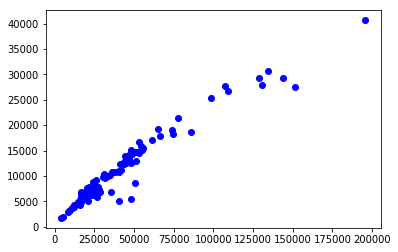

In [28]:
plt.plot(stats.length, stats.unique, "bo")

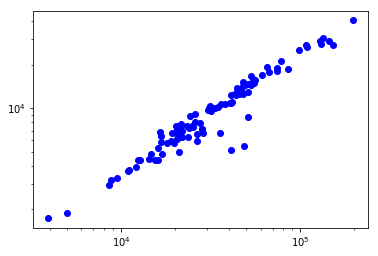

In [29]:
plt.loglog(stats.length, stats.unique, "bo")

In [30]:
stats[stats.language == "English"]

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449
6,English,Shakespeare,Romeo and Juliet,40776,5118
7,English,Shakespeare,The Merchant of Venice,20949,4978


In [31]:
stats[stats.language == "French"]

,language,author,title,length,unique
8,French,Chevalier,L'åle de sable,73801,18989
9,French,Chevalier,L'enfer et le paradis de l'autre monde,40827,10831
10,French,Chevalier,La capitaine,46306,13083
11,French,Chevalier,La fille des indiens rouges,66621,17875
12,French,Chevalier,La fille du pirate,52519,14649
13,French,Chevalier,Le chasseur noir,51341,12945
14,French,Chevalier,Les derniers Iroquois,55565,15583
15,French,De maupassant,Boule de Suif,35905,10725
16,French,De maupassant,Claire de Lune,25975,8076
17,French,De maupassant,Contes de la Becasse,34723,10210


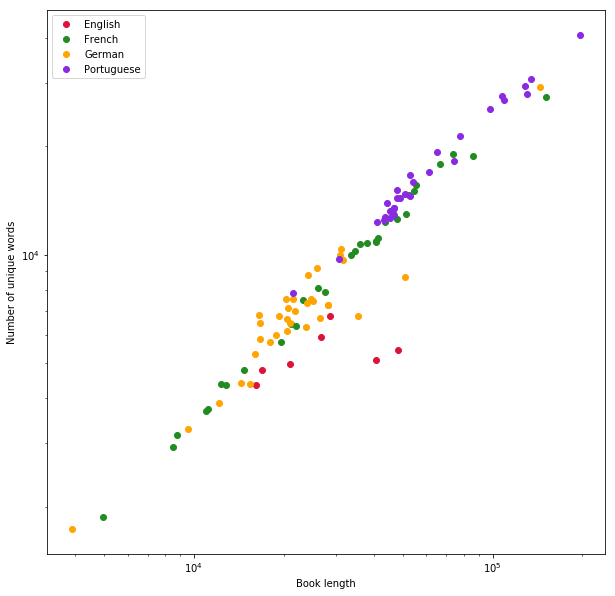

In [32]:
plt.figure(figsize = (10, 10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")
subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "forestgreen")
subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")
subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color = "blueviolet")
plt.legend()
plt.xlabel("Book length")
plt.ylabel('Number of unique words')
plt.savefig("lang_plot.pdf")